In [46]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv(r"C:\Users\Aarya\Downloads\email_classification_dataset.csv")

df.head()

,id,email,label
0,2685,From: support@legitcompany.com\nSubject: Regar...,ham
1,5857,From: noreply@softwareupdates.com\nSubject: We...,ham
2,2399,From: noreply@softwareupdates.com\nSubject: Im...,ham
3,3244,From: info@customerservice.co\nSubject: Team S...,ham
4,2844,From: info@customerservice.co\nSubject: Team S...,ham


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   email   10000 non-null  object
 2   label   10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [55]:
df.shape

(10000, 3)

label
ham     8500
spam    1500
Name: count, dtype: int64


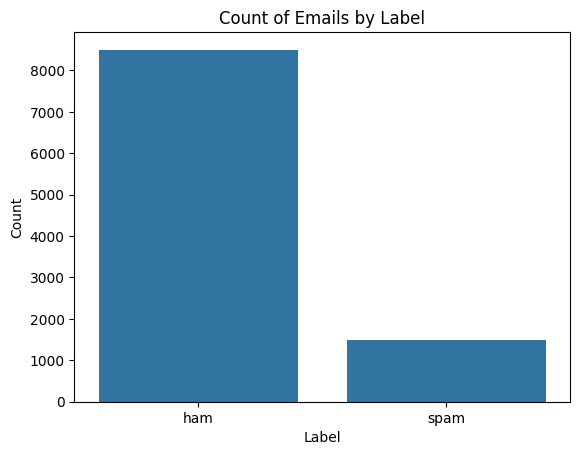

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df['label'].value_counts())

sns.countplot(x='label',data=df)
plt.title('Count of Emails by Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [57]:

print("Unique label values before mapping:", df['label'].unique())

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

df['label'].head




Unique label values before mapping: ['ham' 'spam']


<bound method NDFrame.head of 0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: label, Length: 10000, dtype: int64>

In [58]:
df['label'].notnull().sum()

np.int64(10000)

In [59]:
# Drop rows with NaN in 'email' or 'label'
df_clean = df.dropna(subset=['email', 'label'])

X = df_clean['email']
Y = df_clean['label']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial NB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
    }

In [60]:
from sklearn.metrics import classification_report, confusion_matrix


def evaluate_models(models, X_train_vec, Y_train, X_test_vec, Y_test):
    results = []

    for name, model in models.items():
        print(f"Training: {name}")
        model.fit(X_train_vec, Y_train)
        preds = model.predict(X_test_vec)
        acc = accuracy_score(Y_test, preds)

        print(f"Accuracy: {acc:.4f}")
        print(classification_report(Y_test, preds))
        print(confusion_matrix(Y_test, preds))

        results.append({
            "Model": name,
            "Accuracy": acc
        })

    return pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

In [61]:
summary = evaluate_models(models, X_train_vec, Y_train, X_test_vec, Y_test)
print(summary)

Training: Logistic Regression
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1682
           1       1.00      1.00      1.00       318

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

[[1682    0]
 [   0  318]]
Training: Multinomial NB
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1682
           1       1.00      1.00      1.00       318

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

[[1682    0]
 [   0  318]]
Training: Random Forest
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1682
           1       1.00      1.00      1.00       318